In [ ]:
!nvidia-smi



Mon May  5 12:08:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!unzip /content/football-players-detection.v14i.yolov11.zip

Archive:  /content/football-players-detection.v14i.yolov11.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/08fd33_3_6_png.rf.59c53594a8085def455867566b62d6f5.jpg  
 extracting: test/images/08fd33_9_3_png.rf.3a908d1bac9a1a948b1ff41676b7adfb.jpg  
 extracting: test/images/40cd38_7_6_png.rf.9086647de5bd5996fba2572de102d873.jpg  
 extracting: test/images/42ba34_1_5_png.rf.5a7374eb29b8c559d339a0749fe7bfa6.jpg  
 extracting: test/images/42ba34_5_5_png.rf.593bf88d83e90046b09288a04b7149f3.jpg  
 extracting: test/images/4b770a_1_4_png.rf.ed4ac58438f0dfbf6485ebcbf0f05819.jpg  
 extracting: test/images/4b770a_1_6_png.rf.c243d08b8a11de2a1939459900d6a810.jpg  
 extracting: test/images/4b770a_1_8_png.rf.4444d966eeb36785e38ad97893d3d6d3.jpg  
 extracting: test/images/4b770a_3_6_png.rf.63f8cad1daa259a51658b8e6dae4421d.jpg  
 extracting: test/images/4b770a_3_9_png.

In [ ]:
import os
DATASET_DIR = "/content/"
print("Dataset directory:", DATASET_DIR)

# Set environment variable to avoid memory fragmentation
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

!pip install -q ultralytics

Dataset directory: /content/


In [ ]:
import os
import glob

# Define splits
splits = ['train', 'valid', 'test']
dataset_yaml_path = os.path.join(DATASET_DIR, 'data.yaml')

# Verify data.yaml exists
if not os.path.exists(dataset_yaml_path):
    print(f"Error: {dataset_yaml_path} does not exist.")
else:
    print(f"Found data.yaml at: {dataset_yaml_path}")
    # Print data.yaml contents for debugging
    with open(dataset_yaml_path, 'r') as f:
        print("data.yaml contents:\n", f.read())

# Verify images and labels for each split
for split in splits:
    images_dir = os.path.join(DATASET_DIR, split, 'images')
    labels_dir = os.path.join(DATASET_DIR, split, 'labels')

    # Check images
    if os.path.exists(images_dir):
        image_files = glob.glob(os.path.join(images_dir, '*.jpg')) + glob.glob(os.path.join(images_dir, '*.png'))
        print(f"Found {len(image_files)} images in {images_dir}")
    else:
        print(f"Error: {images_dir} does not exist.")

    # Check labels
    if os.path.exists(labels_dir):
        label_files = glob.glob(os.path.join(labels_dir, '*.txt'))
        print(f"Found {len(label_files)} label files in {labels_dir}")
    else:
        print(f"Error: {labels_dir} does not exist.")

Found data.yaml at: /content/data.yaml
data.yaml contents:
 train: ../train/images
val: ../valid/images
test: ../test/images

nc: 4
names: ['ball', 'goalkeeper', 'player', 'referee']

roboflow:
  workspace: roboflow-jvuqo
  project: football-players-detection-3zvbc
  version: 14
  license: CC BY 4.0
  url: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/14
Found 298 images in /content/train/images
Found 298 label files in /content/train/labels
Found 49 images in /content/valid/images
Found 49 label files in /content/valid/labels
Found 25 images in /content/test/images
Found 25 label files in /content/test/labels


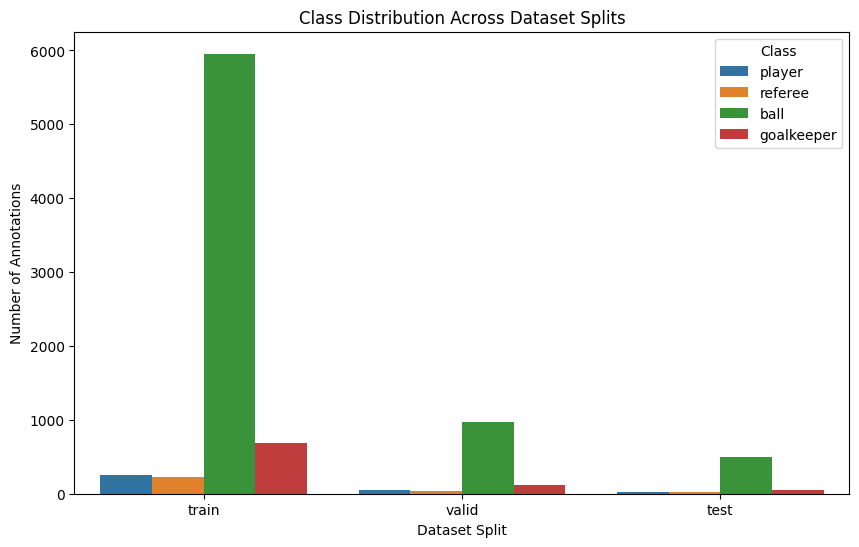


Class Distribution Summary:

Train Split:
player: 258 annotations
referee: 230 annotations
ball: 5955 annotations
goalkeeper: 690 annotations

Valid Split:
player: 45 annotations
referee: 39 annotations
ball: 973 annotations
goalkeeper: 117 annotations

Test Split:
player: 24 annotations
referee: 19 annotations
ball: 499 annotations
goalkeeper: 56 annotations


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd

# Define class mapping
class_mapping = {'player': 0, 'referee': 1, 'ball': 2, 'goalkeeper': 3}
class_names = ['player', 'referee', 'ball', 'goalkeeper']

# Collect class counts from .txt files
class_counts = {'split': [], 'class': [], 'count': []}
for split in splits:
    labels_dir = os.path.join(DATASET_DIR, split, 'labels')
    if not os.path.exists(labels_dir):
        print(f"Warning: {labels_dir} does not exist.")
        continue

    # Initialize counts for this split
    split_counts = {name: 0 for name in class_names}

    # Read each .txt file
    for txt_file in glob.glob(os.path.join(labels_dir, '*.txt')):
        with open(txt_file, 'r') as f:
            for line in f:
                class_id = int(line.split()[0])
                if class_id >= len(class_names):
                    print(f"Warning: Invalid class_id {class_id} in {txt_file}, skipping.")
                    continue
                class_name = class_names[class_id]
                split_counts[class_name] += 1

    # Add counts to data
    for class_name in class_names:
        class_counts['split'].append(split)
        class_counts['class'].append(class_name)
        class_counts['count'].append(split_counts[class_name])

# Create DataFrame
counts_df = pd.DataFrame(class_counts)

# Plot bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=counts_df, x='split', y='count', hue='class')
plt.title('Class Distribution Across Dataset Splits')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Annotations')
plt.legend(title='Class')
plt.savefig(os.path.join(DATASET_DIR, 'class_distribution.png'))
plt.show()

# Print summary statistics
print("\nClass Distribution Summary:")
for split in splits:
    split_df = counts_df[counts_df['split'] == split]
    print(f"\n{split.capitalize()} Split:")
    for class_name in class_names:
        count = split_df[split_df['class'] == class_name]['count'].iloc[0]
        print(f"{class_name}: {count} annotations")

In [ ]:
!pip install -q ultralytics albumentations



Before augmentation: 24 bboxes, 24 class labels for /content/train/images/cd987c_9_8_png.rf.efff7b8622ab4f32b422f1bfab48a30e.jpg
After augmentation: 24 bboxes, 24 class labels for /content/train/images/cd987c_9_8_png.rf.efff7b8622ab4f32b422f1bfab48a30e.jpg


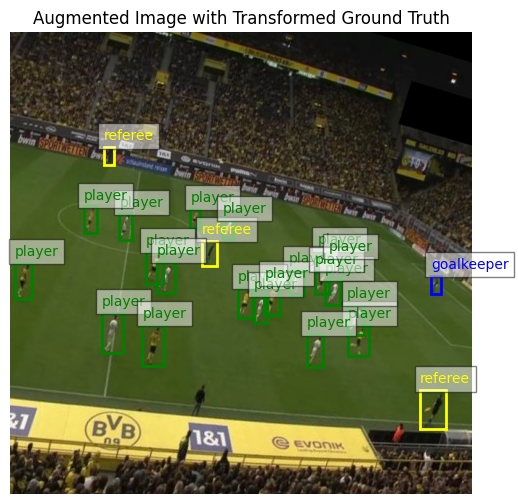

Before augmentation: 25 bboxes, 25 class labels for /content/train/images/798b45_1_6_png.rf.ca6bc3b2dccf176521af9e52b48637a9.jpg
After augmentation: 25 bboxes, 25 class labels for /content/train/images/798b45_1_6_png.rf.ca6bc3b2dccf176521af9e52b48637a9.jpg


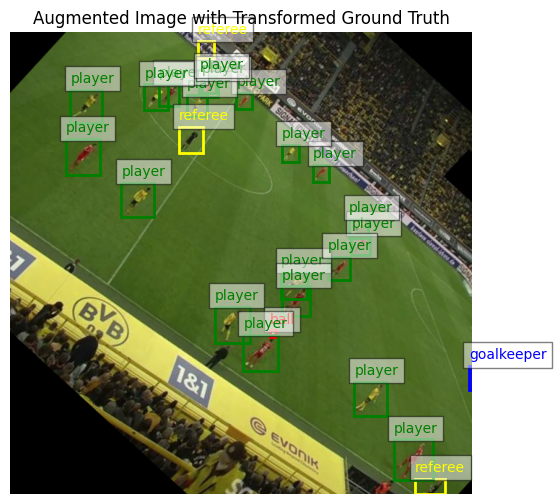

Before augmentation: 23 bboxes, 23 class labels for /content/train/images/121364_9_5_png.rf.7890bf4560e3f804edcd85250d72dd19.jpg
After augmentation: 23 bboxes, 23 class labels for /content/train/images/121364_9_5_png.rf.7890bf4560e3f804edcd85250d72dd19.jpg


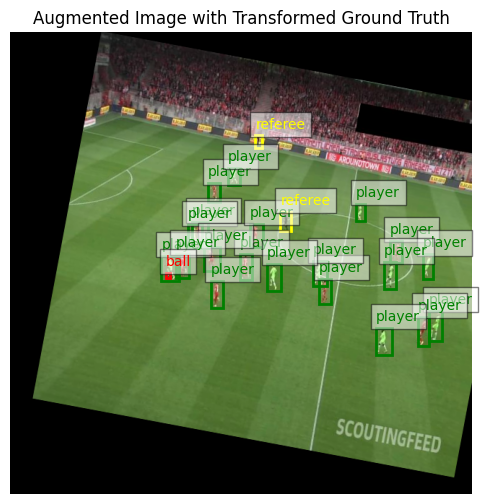

In [ ]:
import albumentations as A
import matplotlib.pyplot as plt
import glob
import random
import numpy as np
from PIL import Image as PILImage

# Define augmentation pipeline to match training parameters
augmentation_pipeline = A.Compose([
    A.HueSaturationValue(hue_shift_limit=5, sat_shift_limit=0, val_shift_limit=0, p=1.0),  # Approx. hsv_h=0.015
    A.Affine(scale=(0.5, 1.5), translate_percent=(-0.1, 0.1), rotate=(-45, 45), p=1.0),  # Combine scale, translate, rotate
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

# Load dataset
train_images = glob.glob(os.path.join(DATASET_DIR, 'train', 'images', '*.jpg')) + glob.glob(os.path.join(DATASET_DIR, 'train', 'images', '*.png'))

# Define colors for classes
class_names = ['ball', 'goalkeeper', 'player', 'referee']
colors = ['red', 'blue', 'green', 'yellow']

# Select up to 3 random training images
if train_images:
    sample_images = random.sample(train_images, min(3, len(train_images)))

    for img_path in sample_images:
        # Load image
        img = np.array(PILImage.open(img_path))

        # Get corresponding label file
        label_file = os.path.join(DATASET_DIR, 'train', 'labels', os.path.splitext(os.path.basename(img_path))[0] + '.txt')
        if not os.path.exists(label_file):
            print(f"Warning: Label file {label_file} not found, skipping.")
            continue

        # Read original labels
        bboxes = []
        class_labels = []
        with open(label_file, 'r') as f:
            for line in f:
                class_id, center_x, center_y, box_width, box_height = map(float, line.split())
                class_id = int(class_id)
                if class_id >= len(class_names):
                    print(f"Warning: Invalid class_id {class_id} in {label_file}, skipping.")
                    continue
                bboxes.append([center_x, center_y, box_width, box_height])
                class_labels.append(class_id)

        # Debug: Print number of boxes and labels before augmentation
        print(f"Before augmentation: {len(bboxes)} bboxes, {len(class_labels)} class labels for {img_path}")

        # Apply augmentations
        augmented = augmentation_pipeline(image=img, bboxes=bboxes, class_labels=class_labels)
        aug_img = augmented['image']
        aug_bboxes = augmented['bboxes']
        aug_class_labels = augmented['class_labels']

        # Debug: Print number of boxes and labels after augmentation
        print(f"After augmentation: {len(aug_bboxes)} bboxes, {len(aug_class_labels)} class labels for {img_path}")

        # Check if there are valid bounding boxes after augmentation
        if not aug_bboxes or not aug_class_labels:
            print(f"Warning: No valid bboxes or class labels after augmentation for {img_path}, skipping.")
            continue

        # Plot augmented image with transformed ground truth
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.imshow(aug_img)

        img_height, img_width = aug_img.shape[:2]
        for bbox, class_id in zip(aug_bboxes, aug_class_labels):
            center_x, center_y, box_width, box_height = bbox
            class_id = int(class_id)  # Ensure class_id is an integer
            # Convert YOLO format to pixel coordinates
            xmin = (center_x - box_width / 2) * img_width
            xmax = (center_x + box_width / 2) * img_width
            ymin = (center_y - box_height / 2) * img_height
            ymax = (center_y + box_height / 2) * img_height

            # Draw bounding box
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor=colors[class_id], facecolor='none', linewidth=2)
            ax.add_patch(rect)
            ax.text(xmin, ymin - 10, class_names[class_id], color=colors[class_id], fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

        ax.set_title('Augmented Image with Transformed Ground Truth')
        ax.axis('off')
        plt.savefig(os.path.join(DATASET_DIR, f'augmented_sample_{os.path.basename(img_path)}.png'))
        plt.show()
else:
    print("No training images found.")

# Note: This section uses albumentations to visualize augmentations, as Ultralytics handles augmentations internally during training.

In [ ]:
from ultralytics import YOLO

# Load YOLOv11 model
model = YOLO('yolo11x.pt')

# Train the model with optimized settings and augmentation
model.train(
    data=dataset_yaml_path,
    task='detect',
    mode='train',
    epochs=50,
    batch=2,  # Reduced batch size to lower memory usage
    imgsz=640,  # Reduced image size to lower memory usage
    plots=True,
    name='yolo11x_all_classes_detector',
    # accumulate=3,  # Gradient accumulation to simulate batch size of 6 (2 * 3)
    device=0,  # Explicitly use GPU
    # Augmentation parameters (ground truth annotations are automatically adjusted)
    hsv_h=0.015,  # Hue adjustment (fraction of color wheel, ±1.5% variation)
    scale=0.5,  # Random scaling/cropping (±50% zoom)
    translate=0.1,  # Random translation (±10% of image size)
    degrees=45.0,  # Random rotation (±45 degrees)
    mosaic=1.0,  # Mosaic augmentation (combine 4 images, 100% probability)
    copy_paste=0.3  # Copy-paste augmentation (30% probability to add objects)
)

# Note on Augmentation:
# - The augmentations increase the effective training dataset size by approximately 3-4x:
#   - Mosaic (mosaic=1.0) combines four images per sample, quadrupling the number of unique training samples per epoch.
#   - Copy-paste (copy_paste=0.3) adds objects to 30% of images, contributing additional unique samples.
#   - Random crops (scale, translate), hue adjustments (hsv_h), and rotations (rotate) further diversify each sample, amplifying variability across epochs.
# - All transformations are applied randomly per training iteration, ensuring varied versions of each image (e.g., different crops, hues, rotations) are seen in each batch.
# - Ultralytics automatically adjusts ground truth bounding boxes and class labels to match the augmented images, ensuring accurate training.

# Note: If memory issues persist, try switching to a lighter model:
# model = YOLO('yolo11n.pt')

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.3, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=45.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11x_all_classes_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

100%|██████████| 755k/755k [00:00<00:00, 19.3MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              


  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  8                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  9                  -1  1   1476864  ultralytics.nn.modules.block.SPPF            [768, 768, 5]                 
 10                  -1  2   3264768  ultralytics.nn.modules.block.C2PSA           [768, 768, 2]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  2   5612544  ultralytics.nn.modules.block.C3k2            [1536, 768, 2, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None

100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1394.6±883.0 MB/s, size: 62.1 KB)


train: Scanning /content/train/labels... 298 images, 0 backgrounds, 0 corrupt: 100%|██████████| 298/298 [00:00<00:00, 2346.91it/s]

train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 821.0±554.9 MB/s, size: 61.9 KB)


val: Scanning /content/valid/labels... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<00:00, 920.38it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/yolo11x_all_classes_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11x_all_classes_detector
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.99G      1.585      1.297      1.043         65        640: 100%|██████████| 149/149 [00:32<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.13it/s]

                   all         49       1174      0.109      0.127     0.0715     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.31G      1.584      1.063      1.037         65        640: 100%|██████████| 149/149 [00:29<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.14it/s]


                   all         49       1174      0.521      0.218       0.23     0.0516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.64G      1.579      1.062      1.038         18        640: 100%|██████████| 149/149 [00:29<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.99it/s]


                   all         49       1174      0.587      0.331      0.393      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.96G      1.633      1.072      1.049         73        640: 100%|██████████| 149/149 [00:30<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.93it/s]


                   all         49       1174      0.215      0.277      0.238     0.0734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.27G      1.555       1.04      1.031         81        640: 100%|██████████| 149/149 [00:30<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.89it/s]


                   all         49       1174      0.816      0.272      0.367      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.59G       1.57      1.045      1.022         80        640: 100%|██████████| 149/149 [00:30<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.93it/s]


                   all         49       1174      0.668      0.371      0.386      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.92G      1.473     0.8951     0.9933         33        640: 100%|██████████| 149/149 [00:30<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.91it/s]


                   all         49       1174      0.598      0.547      0.514      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.24G      1.427      0.872     0.9849         30        640: 100%|██████████| 149/149 [00:30<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.88it/s]


                   all         49       1174      0.666      0.499      0.519      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.55G      1.413     0.8418     0.9792         76        640: 100%|██████████| 149/149 [00:30<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.85it/s]


                   all         49       1174      0.629      0.539      0.557      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.87G       1.35     0.8159     0.9626         34        640: 100%|██████████| 149/149 [00:30<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.79it/s]


                   all         49       1174      0.518      0.482      0.499      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       6.2G      1.297     0.7548     0.9536         50        640: 100%|██████████| 149/149 [00:30<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.98it/s]


                   all         49       1174      0.554      0.525      0.569      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.52G      1.309     0.7559     0.9514         35        640: 100%|██████████| 149/149 [00:30<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.84it/s]


                   all         49       1174      0.726      0.623      0.652      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.85G      1.321     0.7318     0.9533         60        640: 100%|██████████| 149/149 [00:30<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.84it/s]


                   all         49       1174      0.534      0.543      0.531      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.17G      1.307      0.764     0.9557         90        640: 100%|██████████| 149/149 [00:30<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.09it/s]

                   all         49       1174      0.778      0.481      0.494      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.48G      1.323     0.7561     0.9525         38        640: 100%|██████████| 149/149 [00:30<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.00it/s]


                   all         49       1174       0.64      0.581      0.607      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.15G      1.253     0.7006     0.9301        110        640: 100%|██████████| 149/149 [00:30<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.91it/s]


                   all         49       1174      0.629       0.56      0.582      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.31G      1.253     0.7023     0.9298         52        640: 100%|██████████| 149/149 [00:30<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.93it/s]


                   all         49       1174      0.626      0.547      0.586      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.63G      1.294     0.7118     0.9366        102        640: 100%|██████████| 149/149 [00:30<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.89it/s]

                   all         49       1174      0.761      0.598      0.653      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.95G      1.262     0.7182     0.9311         64        640: 100%|██████████| 149/149 [00:30<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.04it/s]


                   all         49       1174      0.706      0.578      0.607      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.26G      1.224     0.6857     0.9257         68        640: 100%|██████████| 149/149 [00:30<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.91it/s]


                   all         49       1174      0.728      0.586       0.65      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.58G      1.213     0.6692     0.9334        115        640: 100%|██████████| 149/149 [00:30<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.21it/s]

                   all         49       1174      0.668      0.582      0.626      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.91G      1.197     0.6517     0.9242         28        640: 100%|██████████| 149/149 [00:30<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.85it/s]

                   all         49       1174      0.735      0.518      0.577      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.25G      1.194     0.6443     0.9124         79        640: 100%|██████████| 149/149 [00:30<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.80it/s]


                   all         49       1174      0.763      0.679      0.678      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.54G      1.207     0.6485     0.9131         37        640: 100%|██████████| 149/149 [00:30<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.86it/s]


                   all         49       1174      0.688      0.643      0.656       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.88G      1.194     0.6299     0.9193         78        640: 100%|██████████| 149/149 [00:30<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.88it/s]

                   all         49       1174      0.704      0.567      0.597      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.21G      1.182     0.6181     0.9131         66        640: 100%|██████████| 149/149 [00:30<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.88it/s]


                   all         49       1174      0.672      0.572      0.606      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.53G      1.203     0.6385     0.9241        135        640: 100%|██████████| 149/149 [00:30<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.98it/s]


                   all         49       1174      0.687      0.609      0.615      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.84G      1.174     0.6129     0.9167         60        640: 100%|██████████| 149/149 [00:30<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.82it/s]


                   all         49       1174      0.722      0.632       0.67      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.14G       1.18      0.621     0.9029         50        640: 100%|██████████| 149/149 [00:30<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.99it/s]


                   all         49       1174       0.72       0.67      0.706      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.47G      1.145     0.5962     0.9029         55        640: 100%|██████████| 149/149 [00:30<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.94it/s]


                   all         49       1174      0.758      0.612       0.67      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.24G      1.134     0.5921      0.897         42        640: 100%|██████████| 149/149 [00:31<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.87it/s]


                   all         49       1174      0.812      0.619      0.678      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.4G       1.12     0.5929     0.9038         58        640: 100%|██████████| 149/149 [00:30<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.91it/s]


                   all         49       1174      0.688      0.705      0.701      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.63G       1.12      0.584     0.8946         22        640: 100%|██████████| 149/149 [00:30<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.87it/s]


                   all         49       1174       0.77      0.662      0.705      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.94G      1.129     0.5727     0.8995         83        640: 100%|██████████| 149/149 [00:30<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.93it/s]


                   all         49       1174      0.734      0.673      0.706      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.26G      1.146     0.5815     0.8939         46        640: 100%|██████████| 149/149 [00:30<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.95it/s]

                   all         49       1174      0.745      0.647      0.676      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.58G      1.131     0.5736     0.9004         47        640: 100%|██████████| 149/149 [00:30<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.50it/s]

                   all         49       1174      0.826      0.686      0.733      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.93G      1.088     0.5622     0.8864        111        640: 100%|██████████| 149/149 [00:30<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.05it/s]


                   all         49       1174      0.703      0.713      0.719      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.25G       1.08     0.5534     0.8815         98        640: 100%|██████████| 149/149 [00:30<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.01it/s]

                   all         49       1174      0.838       0.68      0.732      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.54G      1.099     0.5555     0.8868         48        640: 100%|██████████| 149/149 [00:30<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.91it/s]


                   all         49       1174      0.817      0.697       0.74      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.86G      1.069     0.5443     0.8807         25        640: 100%|██████████| 149/149 [00:30<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.47it/s]


                   all         49       1174      0.753       0.75      0.757      0.317
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.14G      1.025     0.5262     0.8789         48        640: 100%|██████████| 149/149 [00:30<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.83it/s]

                   all         49       1174      0.835      0.702      0.745      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.47G      1.044     0.5116     0.8836         49        640: 100%|██████████| 149/149 [00:30<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.96it/s]

                   all         49       1174      0.807      0.737      0.757      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.79G      1.015     0.4942     0.8791         48        640: 100%|██████████| 149/149 [00:30<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.99it/s]


                   all         49       1174      0.777      0.705      0.726      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.12G      1.014     0.4958     0.8839         49        640: 100%|██████████| 149/149 [00:30<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.94it/s]


                   all         49       1174      0.768      0.665      0.695      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.43G     0.9938     0.4902     0.8751         48        640: 100%|██████████| 149/149 [00:29<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.52it/s]

                   all         49       1174      0.757      0.674      0.709      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.21G     0.9713     0.4765     0.8647         47        640: 100%|██████████| 149/149 [00:29<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.97it/s]


                   all         49       1174      0.771       0.72      0.726      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.39G     0.9629     0.4734     0.8705         47        640: 100%|██████████| 149/149 [00:29<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.93it/s]

                   all         49       1174      0.788      0.732      0.733      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.59G     0.9699      0.471     0.8668         45        640: 100%|██████████| 149/149 [00:30<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.04it/s]

                   all         49       1174      0.822      0.709      0.744       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.91G     0.9655     0.4658     0.8624         48        640: 100%|██████████| 149/149 [00:30<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.94it/s]


                   all         49       1174      0.829      0.726      0.763      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.23G     0.9451     0.4612     0.8717         44        640: 100%|██████████| 149/149 [00:30<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.00it/s]

                   all         49       1174      0.812      0.735      0.748      0.327



50 epochs completed in 0.501 hours.
Optimizer stripped from runs/detect/yolo11x_all_classes_detector/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/yolo11x_all_classes_detector/weights/best.pt, 114.4MB

Validating runs/detect/yolo11x_all_classes_detector/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 190 layers, 56,831,644 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.71it/s]


                   all         49       1174      0.829      0.726      0.763      0.331
                  ball         45         45      0.755      0.289      0.311     0.0754
            goalkeeper         38         39      0.789      0.846      0.879      0.395
                player         49        973      0.922      0.953      0.976      0.468
               referee         49        117      0.849      0.817      0.884      0.387
Speed: 0.4ms preprocess, 25.6ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/yolo11x_all_classes_detector


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc97850e350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

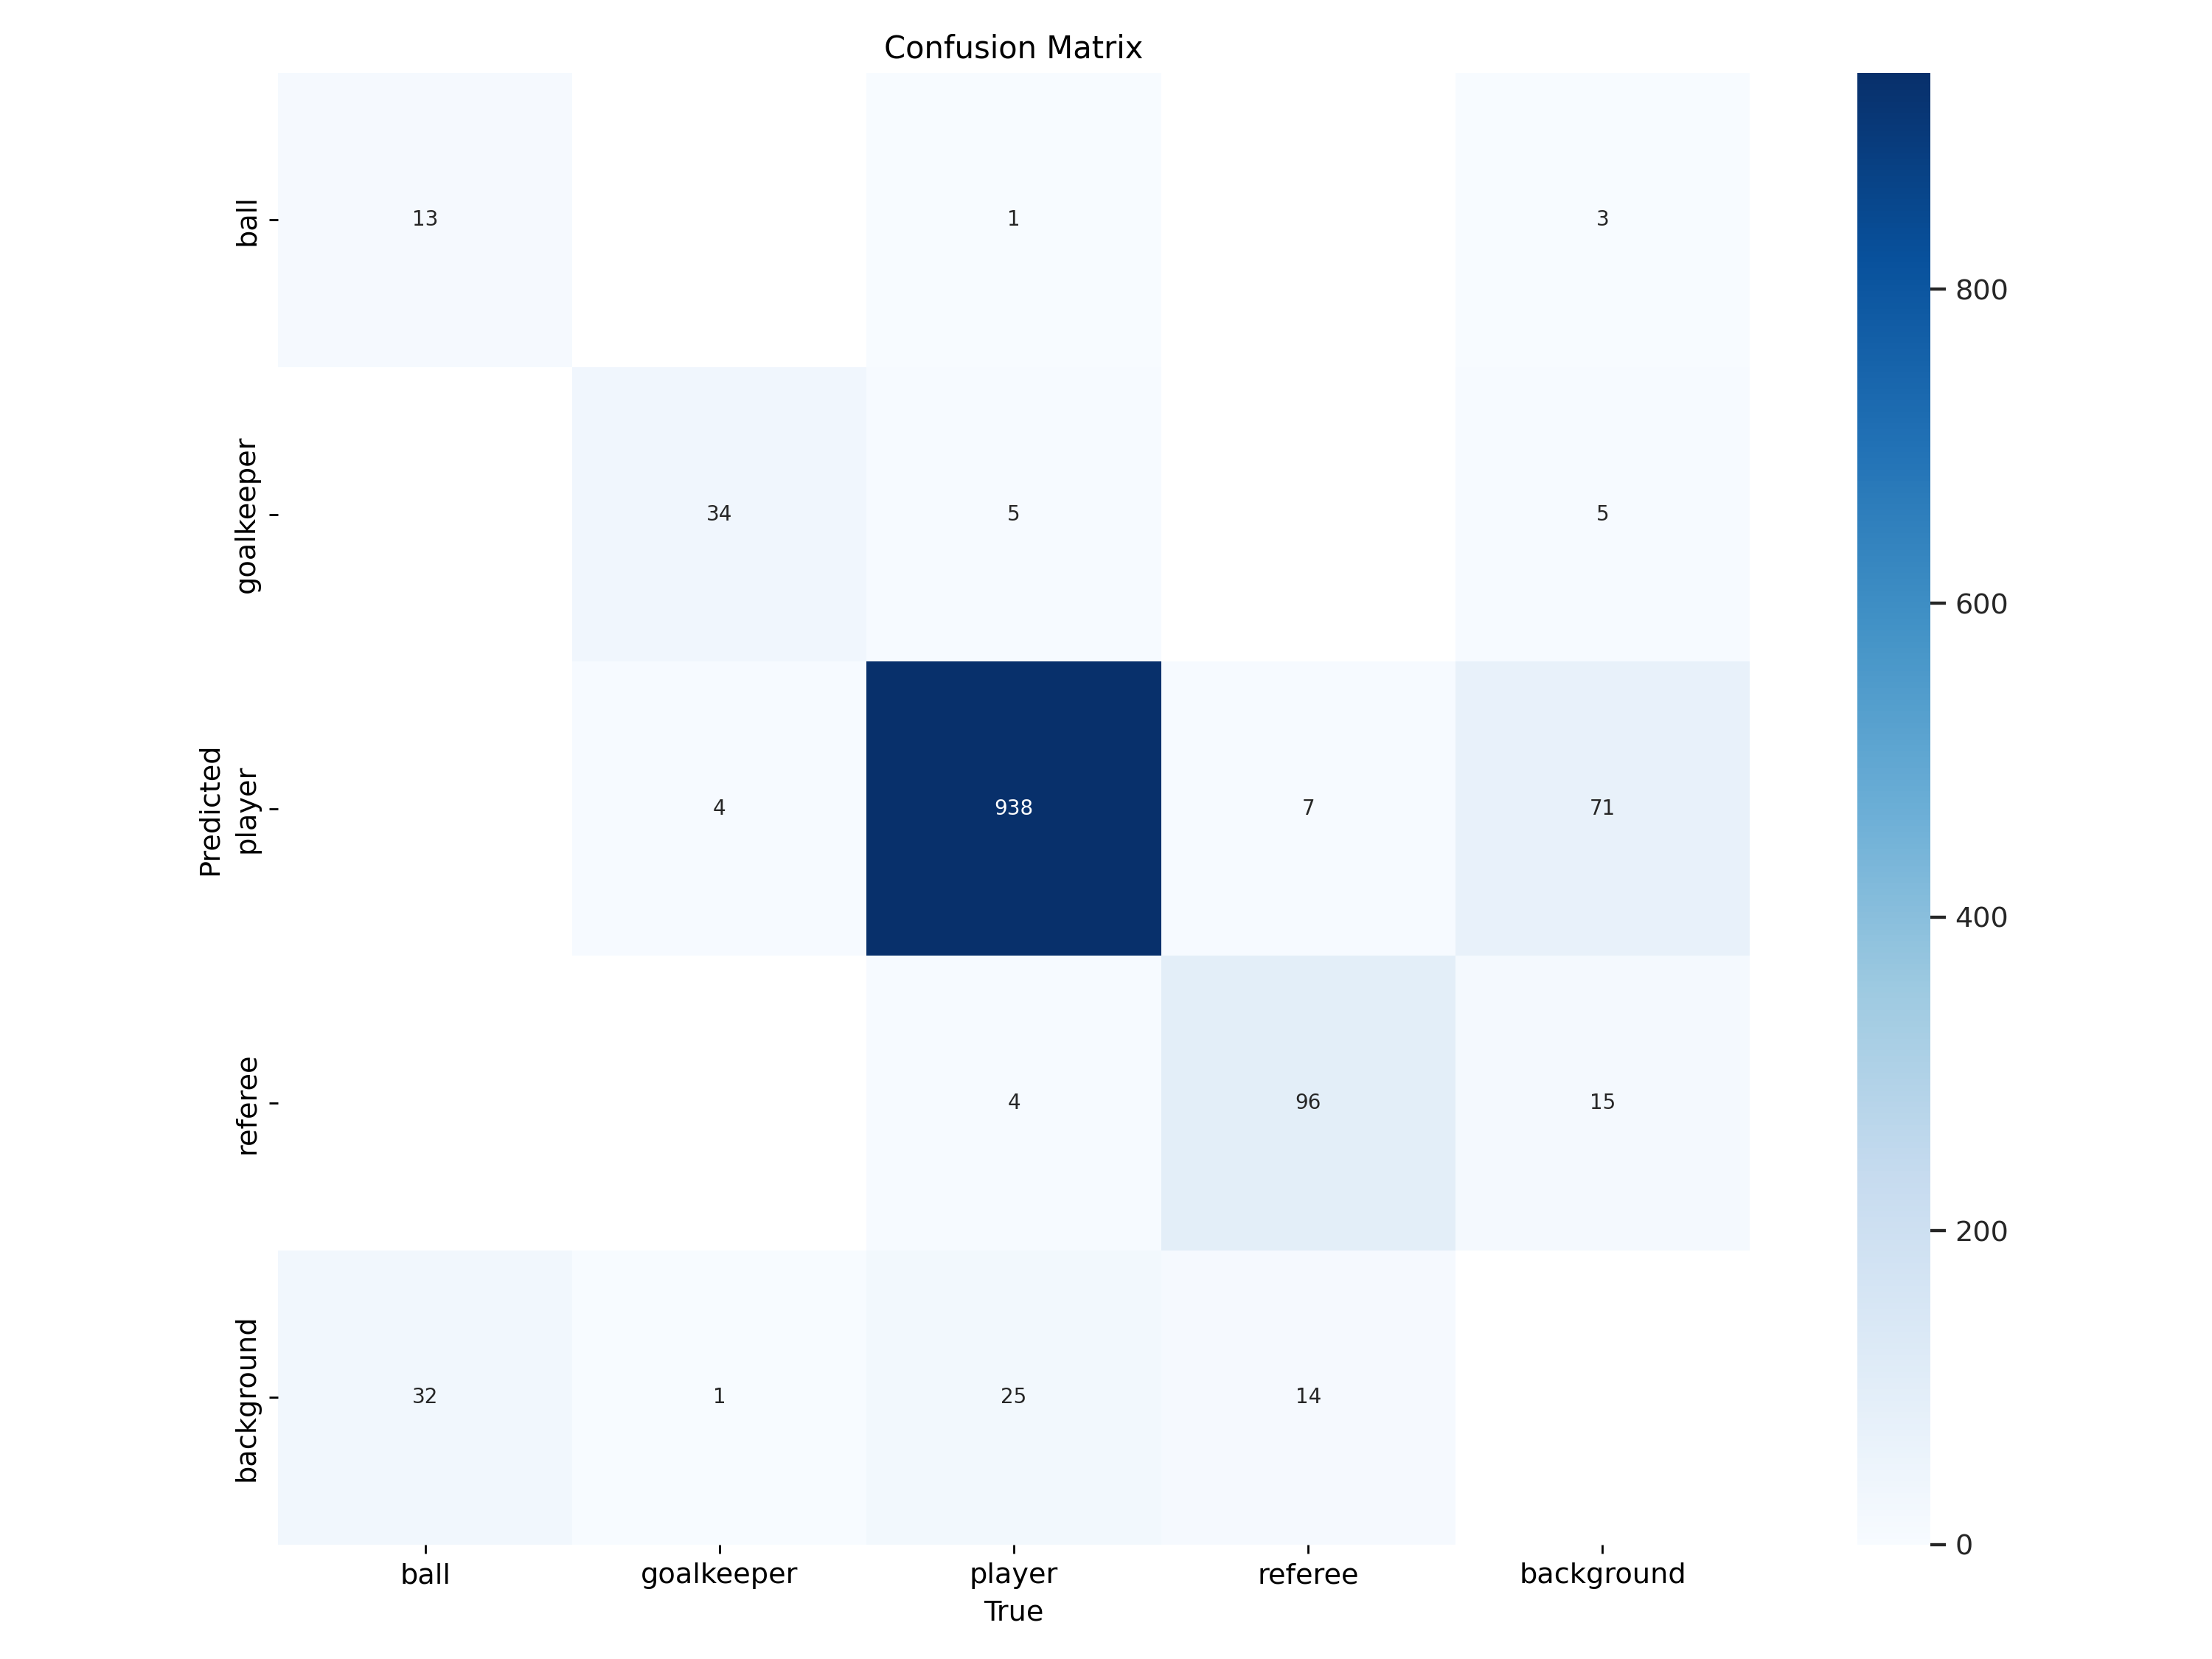

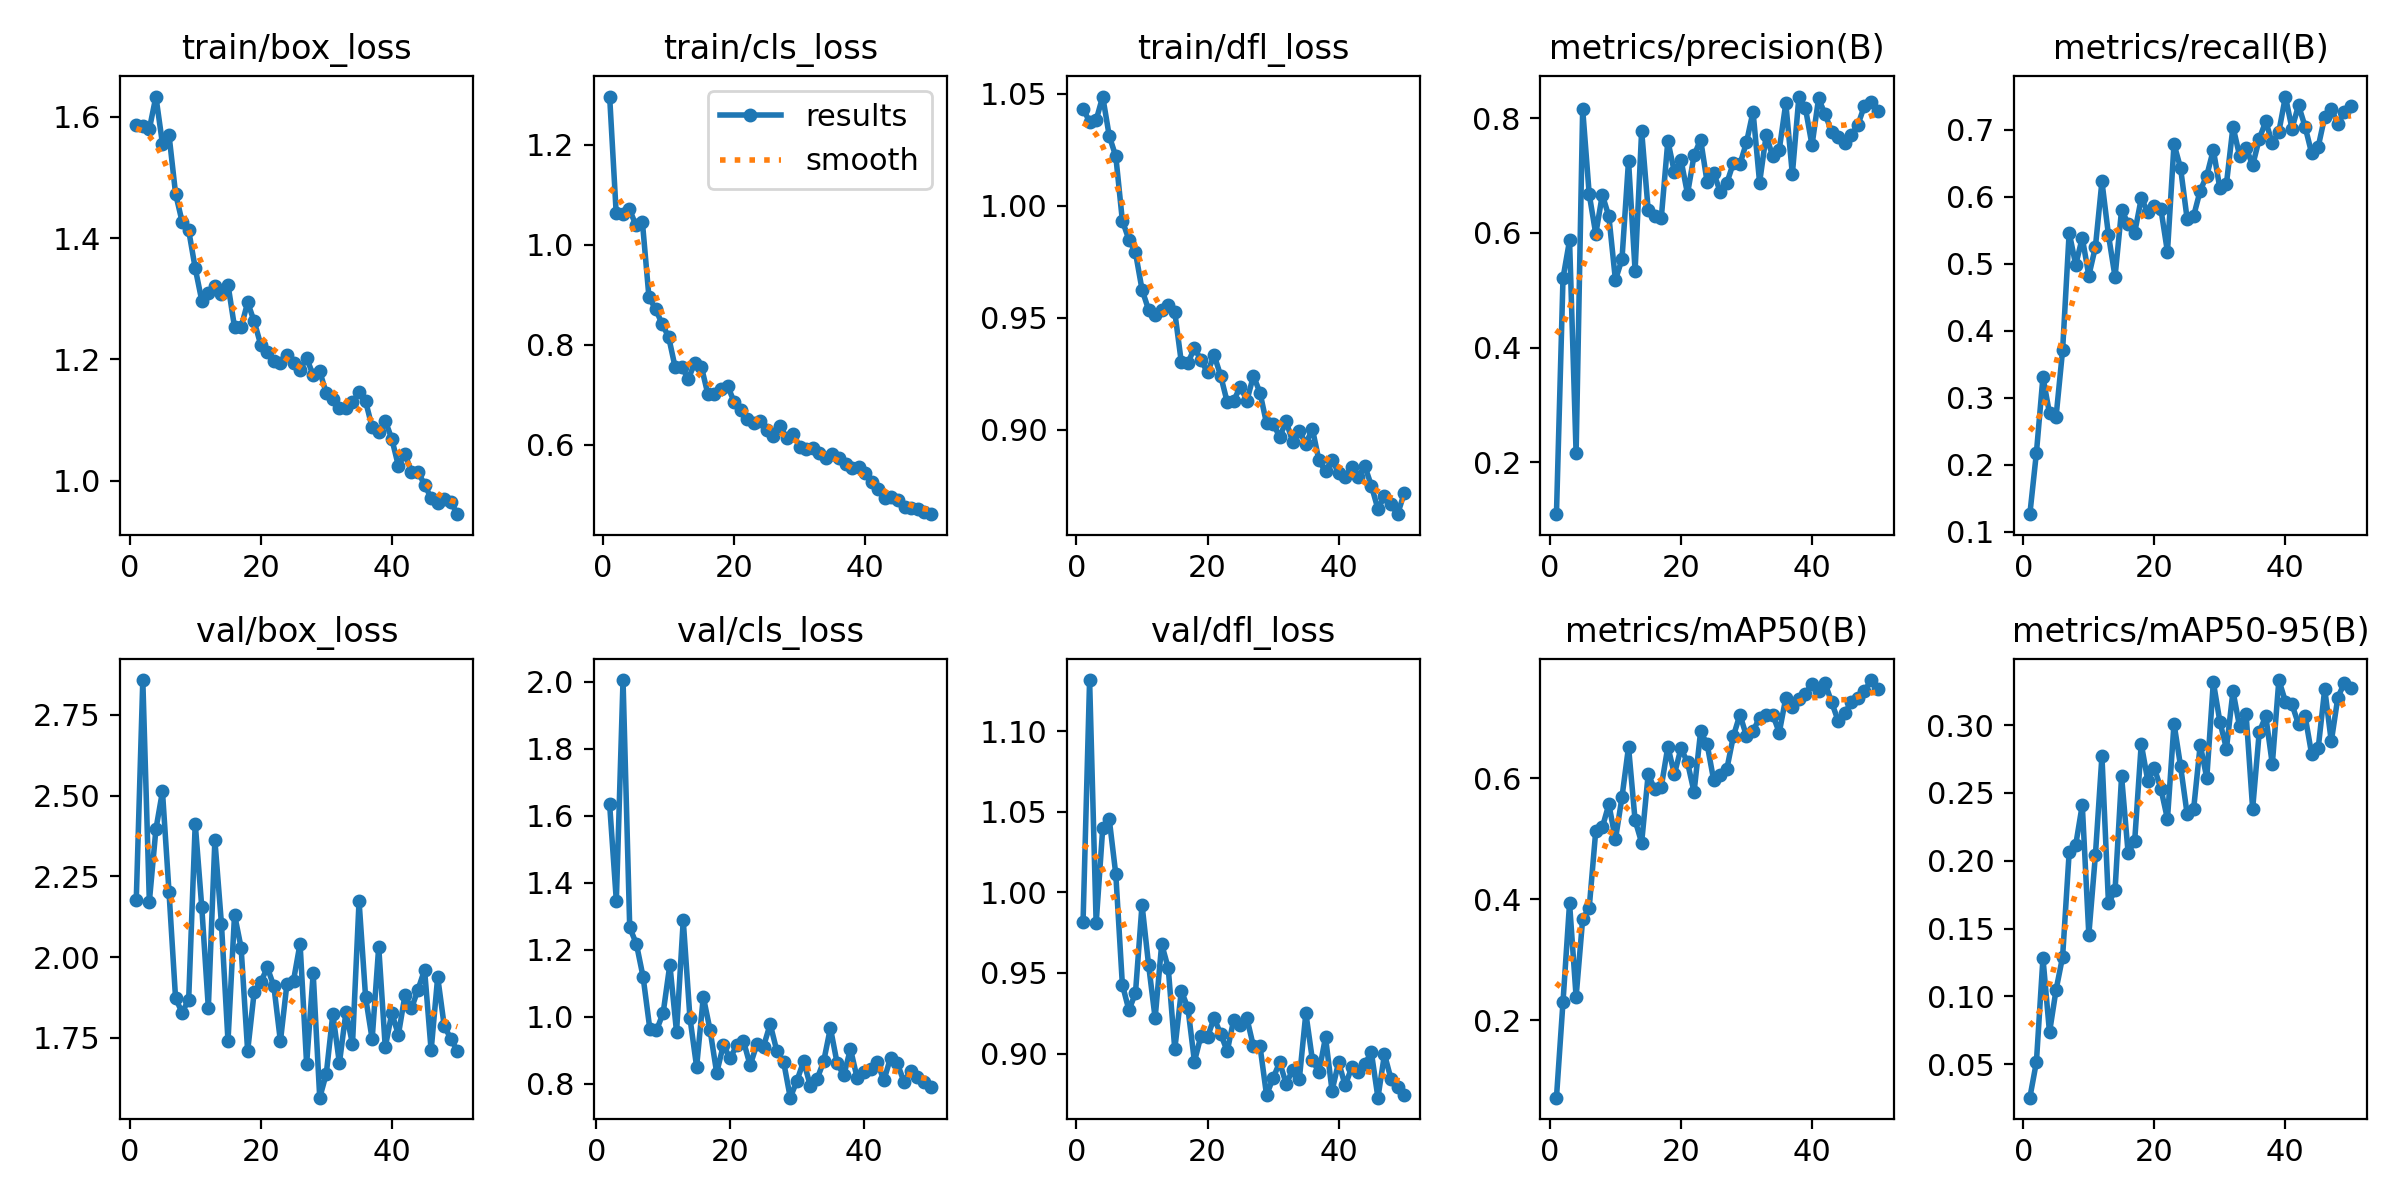

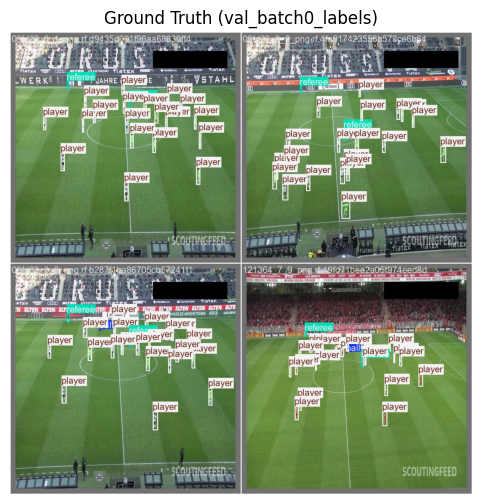

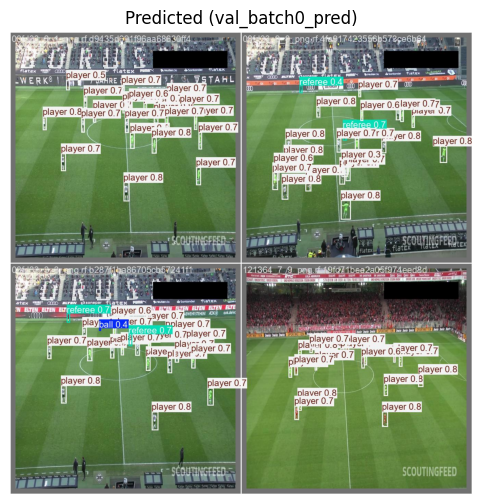

In [ ]:
from IPython.display import Image
import os
import matplotlib.pyplot as plt

# Define run directory
run_dir = os.path.join(DATASET_DIR, 'runs/detect/yolo11x_all_classes_detector')

# Display confusion matrix
confusion_matrix_path = os.path.join(run_dir, 'confusion_matrix.png')
if os.path.exists(confusion_matrix_path):
    display(Image(filename=confusion_matrix_path, width=600))
else:
    print("Confusion matrix not found.")

# Display training results
results_path = os.path.join(run_dir, 'results.png')
if os.path.exists(results_path):
    display(Image(filename=results_path, width=600))
else:
    print("Results plot not found.")

# Display ground truth bounding boxes
ground_truth_path = os.path.join(run_dir, 'val_batch0_labels.jpg')
if os.path.exists(ground_truth_path):
    ground_truth_img = plt.imread(ground_truth_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(ground_truth_img)
    plt.title('Ground Truth (val_batch0_labels)')
    plt.axis('off')
    plt.savefig(os.path.join(run_dir, 'ground_truth.png'))
    plt.show()
else:
    print(f"Ground truth image not found: {ground_truth_path}")

# Display predicted bounding boxes
predicted_path = os.path.join(run_dir, 'val_batch0_pred.jpg')
if os.path.exists(predicted_path):
    predicted_img = plt.imread(predicted_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(predicted_img)
    plt.title('Predicted (val_batch0_pred)')
    plt.axis('off')
    plt.savefig(os.path.join(run_dir, 'predicted.png'))
    plt.show()
else:
    print(f"Predicted image not found: {predicted_path}")

In [ ]:
# Validate the model
model.val(data=dataset_yaml_path, imgsz=640)  # Match training imgsz

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 190 layers, 56,831,644 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1758.5±507.9 MB/s, size: 57.3 KB)


val: Scanning /content/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  6.57it/s]


                   all         49       1174       0.83      0.727      0.759      0.327
                  ball         45         45      0.754      0.289       0.31     0.0769
            goalkeeper         38         39      0.787      0.846      0.871      0.385
                player         49        973      0.924      0.953      0.973      0.467
               referee         49        117      0.857      0.819      0.881      0.379
Speed: 1.4ms preprocess, 65.2ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/yolo11x_all_classes_detector2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc982a86b10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

Running inference on: /content/test/images/40cd38_7_6_png.rf.9086647de5bd5996fba2572de102d873.jpg

image 1/1 /content/test/images/40cd38_7_6_png.rf.9086647de5bd5996fba2572de102d873.jpg: 640x640 19 players, 1 referee, 93.2ms
Speed: 2.8ms preprocess, 93.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


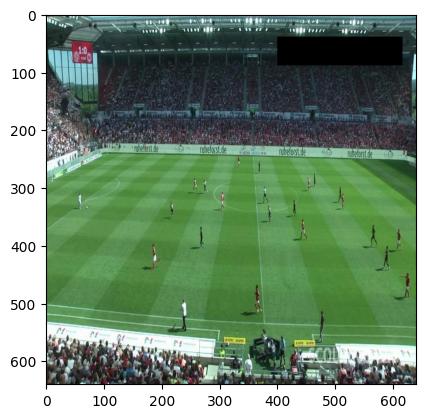

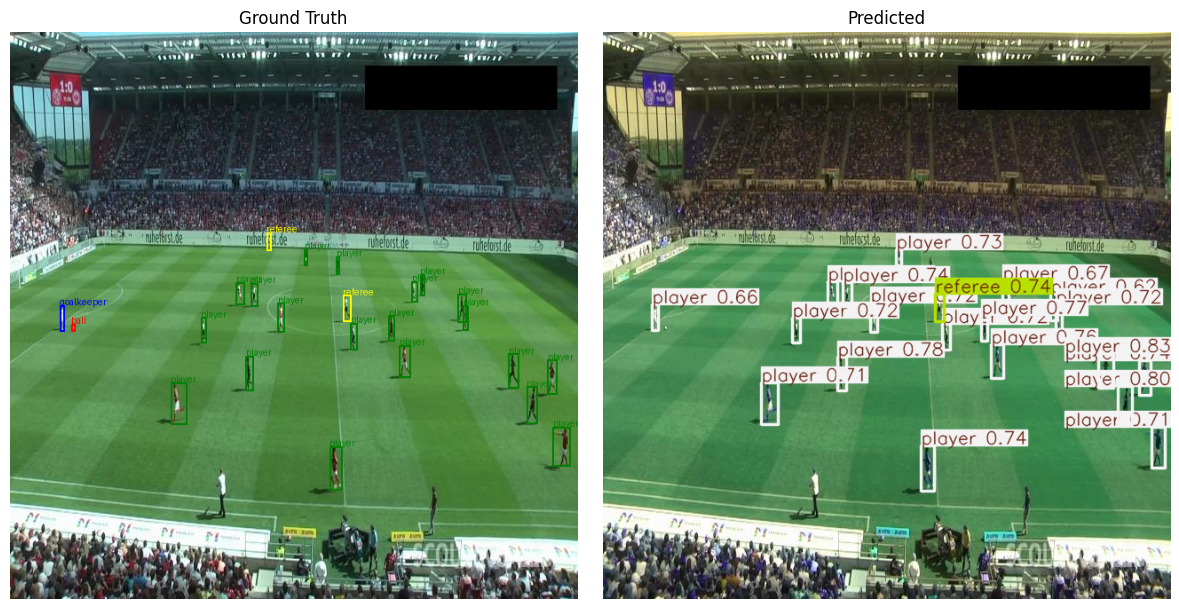

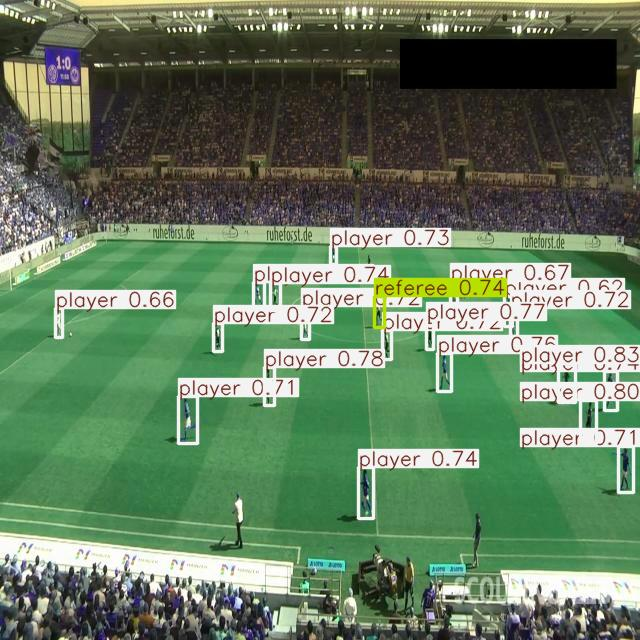

In [ ]:
import glob
import random
from PIL import Image as PILImage
from PIL import ImageDraw, ImageFont
import os
import matplotlib.pyplot as plt
import numpy as np

# Get test images
test_images = glob.glob(os.path.join(DATASET_DIR, 'test', 'images', '*.jpg')) + glob.glob(os.path.join(DATASET_DIR, 'test', 'images', '*.png'))

# Select a random test image
if test_images:
    test_image = random.choice(test_images)
    print("Running inference on:", test_image)

    # Load the test image
    img = PILImage.open(test_image)
    img_width, img_height = img.size

    # Get corresponding label file
    label_file = os.path.join(DATASET_DIR, 'test', 'labels', os.path.splitext(os.path.basename(test_image))[0] + '.txt')

    # Create ground truth image with bounding boxes
    ground_truth_img = img.copy()
    draw = ImageDraw.Draw(ground_truth_img)
    class_names = ['ball', 'goalkeeper', 'player', 'referee']
    colors = ['red', 'blue', 'green', 'yellow']  # Colors for classes

    plt.imshow(img)

    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            for line in f:
                class_id, center_x, center_y, box_width, box_height = map(float, line.split())
                class_id = int(class_id)
                if class_id >= len(class_names):
                    print(f"Warning: Invalid class_id {class_id} in {label_file}, skipping.")
                    continue

                # Convert YOLO format to pixel coordinates
                xmin = (center_x - box_width / 2) * img_width
                xmax = (center_x + box_width / 2) * img_width
                ymin = (center_y - box_height / 2) * img_height
                ymax = (center_y + box_height / 2) * img_height

                # Draw bounding box
                draw.rectangle((xmin, ymin, xmax, ymax), outline=colors[class_id], width=2)
                # Draw class label
                draw.text((xmin, ymin - 10), class_names[class_id], fill=colors[class_id])
    else:
        print(f"Warning: Label file {label_file} not found.")

    # Perform inference
    results = model.predict(test_image, imgsz=640, conf=0.5)  # Match training imgsz
    predicted_img = results[0].plot()  # Plot bounding boxes for all classes

    # Convert PIL ground truth image to numpy array for matplotlib
    ground_truth_np = np.array(ground_truth_img)

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(ground_truth_np)
    ax2.imshow(predicted_img)
    ax1.set_title('Ground Truth')
    ax2.set_title('Predicted')
    ax1.axis('off')
    ax2.axis('off')
    plt.tight_layout()

    # Save and display the comparison
    output_path = os.path.join(DATASET_DIR, 'runs/detect/yolo11x_all_classes_detector/test_inference_comparison.jpg')
    plt.savefig(output_path)
    plt.show()

    # Also save the predicted image separately for reference
    predicted_output_path = os.path.join(DATASET_DIR, 'runs/detect/yolo11x_all_classes_detector/test_inference.jpg')
    PILImage.fromarray(predicted_img).save(predicted_output_path)
    display(Image(filename=predicted_output_path, width=600))

    # Note: The predicted image (`test_inference.jpg`) and comparison (`test_inference_comparison.jpg`) are saved in the run directory to check predicted bounding boxes and class labels against ground truth.

else:
    print("No test images found.")

In [ ]:
model.save("best_mosaic_model.pt")

In [ ]:
from google.colab import files
files.download('best_mosaic_model.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp ./best_mosaic_model.pt /content/drive/MyDrive/best_mosaic_model.pt